<a href="https://colab.research.google.com/github/akshayaaravindpk/Natural-language-Processing/blob/main/imbd_reviews_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/Review.csv")
df

,sentiment,review
0,Negative,I had no background knowledge of this movie be...
1,Negative,I am a huge Jane Austen fan and I ordered the ...
2,Negative,Nothing to say but Wow! Has anyone actually ha...
3,Negative,i like Jane Austin novels. I love Pride and Pr...
4,Negative,In this day and age of incredible special movi...
...,...,...
9995,Positive,I first saw this movie back in the early'90's ...
9996,Positive,"NYC, 2022: The Greenhouse effect, vanished oce..."
9997,Positive,"Those individuals familiar with Asian cinema, ..."
9998,Positive,"The kids, aged 7 to 14, got such a huge kick o..."


In [178]:
rvw=df.review
rvw

0       I had no background knowledge of this movie be...
1       I am a huge Jane Austen fan and I ordered the ...
2       Nothing to say but Wow! Has anyone actually ha...
3       i like Jane Austin novels. I love Pride and Pr...
4       In this day and age of incredible special movi...
                              ...                        
9995    I first saw this movie back in the early'90's ...
9996    NYC, 2022: The Greenhouse effect, vanished oce...
9997    Those individuals familiar with Asian cinema, ...
9998    The kids, aged 7 to 14, got such a huge kick o...
9999    I so love this movie! The animation is great (...
Name: review, Length: 10000, dtype: object

Checking for missing values

In [179]:
df.isnull().sum()

sentiment    0
review       0
dtype: int64

In [180]:
df['sentiment'].value_counts()

Negative    5081
Positive    4919
Name: sentiment, dtype: int64

In [181]:
df['sentiment']=df['sentiment'].map({'Negative':0,'Positive':1})
df

,sentiment,review
0,0,I had no background knowledge of this movie be...
1,0,I am a huge Jane Austen fan and I ordered the ...
2,0,Nothing to say but Wow! Has anyone actually ha...
3,0,i like Jane Austin novels. I love Pride and Pr...
4,0,In this day and age of incredible special movi...
...,...,...
9995,1,I first saw this movie back in the early'90's ...
9996,1,"NYC, 2022: The Greenhouse effect, vanished oce..."
9997,1,"Those individuals familiar with Asian cinema, ..."
9998,1,"The kids, aged 7 to 14, got such a huge kick o..."


Removing special symbols

In [182]:
rvw=rvw.str.replace('[^a-zA-Z0-9]+'," ")
rvw

0       I had no background knowledge of this movie be...
1       I am a huge Jane Austen fan and I ordered the ...
2       Nothing to say but Wow Has anyone actually had...
3       i like Jane Austin novels I love Pride and Pre...
4       In this day and age of incredible special movi...
                              ...                        
9995    I first saw this movie back in the early 90 s ...
9996    NYC 2022 The Greenhouse effect vanished oceans...
9997    Those individuals familiar with Asian cinema a...
9998    The kids aged 7 to 14 got such a huge kick out...
9999    I so love this movie The animation is great fo...
Name: review, Length: 10000, dtype: object

Stemming

In [183]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [184]:
rvw=rvw.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y:" ".join(y))
rvw

0       i had no background knowledg of this movi befo...
1       i am a huge jane austen fan and i order the mo...
2       noth to say but wow has anyon actual had someb...
3       i like jane austin novel i love pride and prej...
4       in this day and age of incred special movi eff...
                              ...                        
9995    i first saw this movi back in the earli 90 s w...
9996    nyc 2022 the greenhous effect vanish ocean gri...
9997    those individu familiar with asian cinema as a...
9998    the kid age 7 to 14 got such a huge kick out o...
9999    i so love this movi the anim is great for a po...
Name: review, Length: 10000, dtype: object

Removing Stopwords

In [185]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [186]:
rvw=rvw.apply(lambda x:[i for i in word_tokenize(x) if i not in sw]).apply(lambda y:" ".join(y))
rvw

0       background knowledg movi befor bought sound co...
1       huge jane austen fan order movi amazon uk coul...
2       noth say wow anyon actual somebodi sneak open ...
3       like jane austin novel love pride prejudic sen...
4       day age incred special movi effect one sore di...
                              ...                        
9995    first saw movi back earli 90 first releas room...
9996    nyc 2022 greenhous effect vanish ocean grind u...
9997    individu familiar asian cinema whole awar japa...
9998    kid age 7 14 got huge kick film gave copi kid ...
9999    love movi anim great pok mon movi cgi look awe...
Name: review, Length: 10000, dtype: object

Vectorizattion

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
X=vec.fit_transform(rvw)
print(X)

  (0, 5334)	0.09145658253050915
  (0, 22839)	0.05213854204531583
  (0, 8975)	0.09914727543845325
  (0, 6028)	0.05403214878876891
  (0, 28635)	0.09704253349701641
  (0, 23634)	0.04682115546519894
  (0, 30638)	0.07023764118719092
  (0, 26610)	0.0597585066993795
  (0, 17497)	0.02408584717412719
  (0, 10447)	0.04363694030870478
  (0, 10107)	0.05997175862033255
  (0, 25039)	0.10461634948919676
  (0, 33883)	0.04614343675399612
  (0, 10530)	0.04630643838203713
  (0, 31739)	0.06626924987320983
  (0, 10390)	0.05627322920278389
  (0, 10174)	0.02928218558799828
  (0, 22873)	0.12513508661510114
  (0, 24372)	0.07273478520587343
  (0, 2596)	0.03394961090025937
  (0, 29279)	0.10024870901727863
  (0, 29655)	0.052966089354675554
  (0, 19034)	0.04670827140240638
  (0, 12577)	0.06348967730696684
  (0, 17853)	0.04097243804521018
  :	:
  (9999, 30196)	0.055167403806016
  (9999, 23385)	0.08796552129975235
  (9999, 21815)	0.09061322266234668
  (9999, 1839)	0.07904698822356039
  (9999, 10716)	0.06491047939036

Assigning the values of x and y and splitting the datas into training set and testing set for prediction

In [189]:
x=X
y=df['sentiment'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Now we create different models for using different algorithms (for prediction)

Accuracy Score(knn): 0.755
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1530
           1       0.73      0.78      0.76      1470

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.75      3000
weighted avg       0.76      0.76      0.75      3000



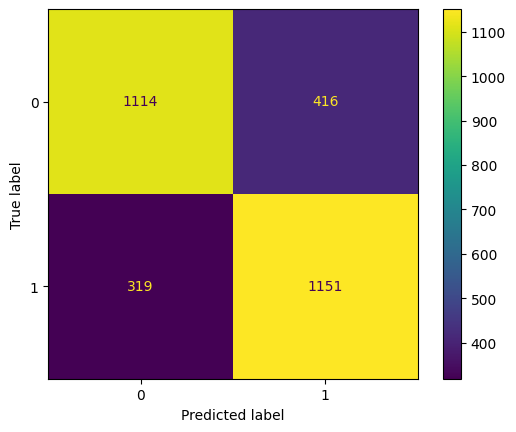

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
accuracy_score_knn=accuracy_score(y_test,y_pred)
print("Accuracy Score(knn):",accuracy_score_knn)
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Support Vector Classifier

Accuracy Score(svc): 0.879
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1530
           1       0.86      0.89      0.88      1470

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



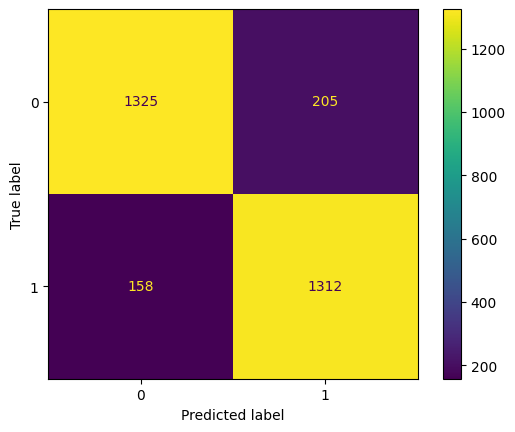

In [191]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
accuracy_score_svc=accuracy_score(y_test,y_pred)
print("Accuracy Score(svc):",accuracy_score_svc)
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Multinomial Naive Bayes

Accuracy Score(nb): 0.8556666666666667
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1530
           1       0.89      0.80      0.85      1470

    accuracy                           0.86      3000
   macro avg       0.86      0.85      0.86      3000
weighted avg       0.86      0.86      0.86      3000



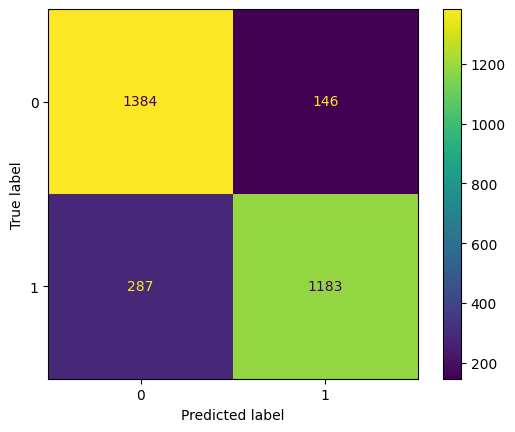

In [192]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
accuracy_score_nb=accuracy_score(y_test,y_pred)
print("Accuracy Score(nb):",accuracy_score_nb)
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Random Forest Classifier

Accuracy Score(rf): 0.841
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1530
           1       0.85      0.82      0.84      1470

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



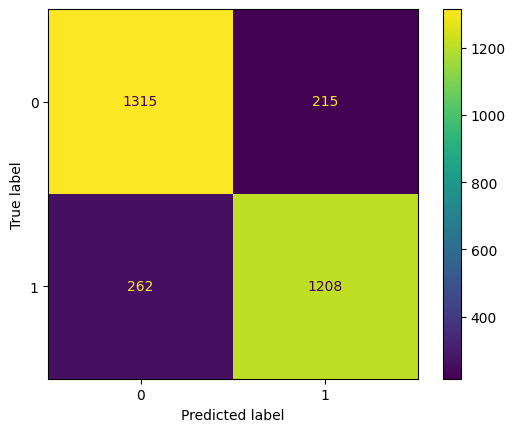

In [193]:
from sklearn. ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
accuracy_score_rf=accuracy_score(y_test,y_pred)
print("Accuracy Score(rf):",accuracy_score_rf)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report (y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions (y_test, y_pred))

AdaBoost

Accuracy Score(ab): 0.841
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1530
           1       0.85      0.82      0.84      1470

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



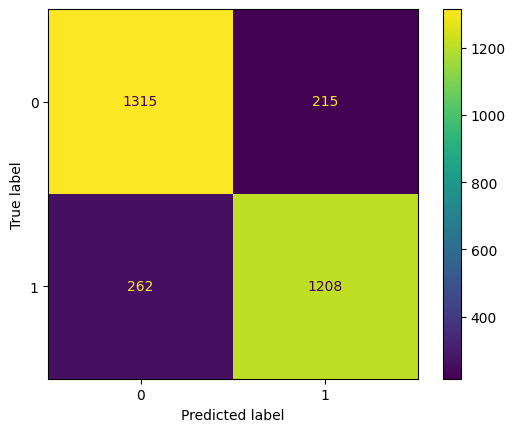

In [194]:
from sklearn. ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
accuracy_score_ab=accuracy_score(y_test,y_pred)
print("Accuracy Score(ab):",accuracy_score_ab)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report (y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions (y_test, y_pred))

**Results of Prediction**

In [195]:
res= {'MODEL': ['K Nearest Neighbors', 'Support Vector Classifier', 'Multinomial Naive Bayes',
                'Random Forest Classifier', 'AdaBoost'],
        'ACCURACY score': [accuracy_score_knn, accuracy_score_svc, accuracy_score_nb,
                           accuracy_score_rf, accuracy_score_ab]}
dfr= pd.DataFrame(res)
dfr

,MODEL,ACCURACY score
0,K Nearest Neighbors,0.755000
1,Support Vector Classifier,0.879000
2,Multinomial Naive Bayes,0.855667
3,Random Forest Classifier,0.841000
4,AdaBoost,0.841000


From above results we conclude that Support Vector Classifier has the highest accuracy.

Hence,predicting sentiment using the most accurate model, ie.,SVM

In [196]:
xyz="I read the back of the box and it talked about Mary Shelley and Percy Shelley and Lord Byron. I thought, 'wonderful! This will be great!' I was so wrong. The story was all"
pred_snt=svc.predict(vec.transform([xyz]))
if pred_snt==0:
  print("Negative")
else:
  print("Positive")

Negative
